# Exercise 6

In [516]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [517]:
dataset

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5
...,...,...
996,"manipis siya masyado, tapos 9pcs lang yung isa...",2
997,maluwang and sobrang nipis. maluwang and sobra...,2
998,hope hindi tayo manloloko di ba???sa dami ng n...,2
999,Nakaka disappointed lng ng sobra sa seller .. ...,2


In [518]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_labels = map_rating_to_sentiment(training_labels)
testing_labels = map_rating_to_sentiment(testing_labels)

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# 1. Tokenize the data

In [519]:
vocab_size = 1500
oov_tok = "<OOV>"

embedding_dim = 16
max_length = 20
trunc_type='post'
padding_type='post'

In [520]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# 2. Sequence the data

In [521]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# 3. Pad the data

In [522]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# 4. Train a sentiment model

In [523]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)        │ (None, 20, 16)         │        24,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_47     │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,109 (94.18 KB)

 Trainable params: 24,109 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [524]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5074 - loss: 0.6929 - val_accuracy: 0.2139 - val_loss: 0.7019
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5772 - loss: 0.6882 - val_accuracy: 0.2189 - val_loss: 0.7109
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6377 - loss: 0.6799 - val_accuracy: 0.2687 - val_loss: 0.7184
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7069 - loss: 0.6664 - val_accuracy: 0.4030 - val_loss: 0.6987
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.6424 - val_accuracy: 0.4428 - val_loss: 0.7018
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7956 - loss: 0.6050 - val_accuracy: 0.6219 - val_loss: 0.6643
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8164 - loss: 0.5771 - val_accuracy: 0.5771 - val_loss: 0.6608
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8521 - loss: 0.5342 - val_accuracy: 0.5323 - val_loss

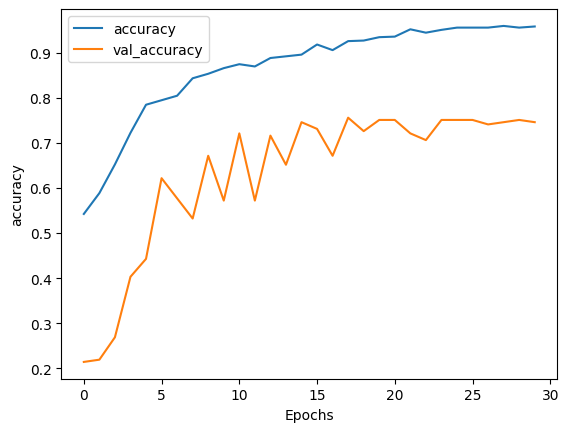

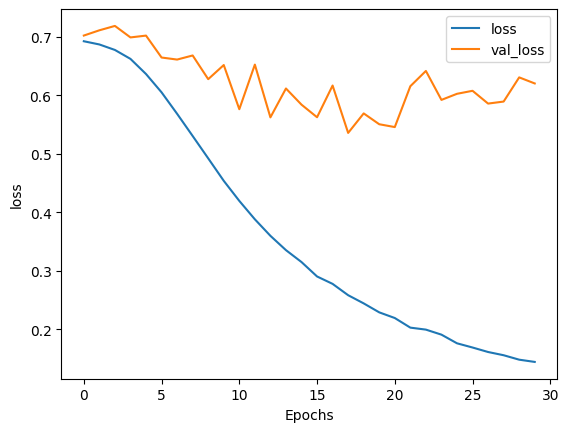

In [525]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Get files for visualing the network

In [526]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1500, 16)


In [527]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [528]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Predict sentiment with new reviews

In [531]:
# Use the model to predict a review
fake_reviews = [
    'Mahal ko ang teleponong ito',
    'Ayoko ng spaghetti',
    'Lahat ay malamig',
    'Lahat ay mainit, eksakto kung paano ko gusto',
    'Lahat ay berde',
    'Agad kaming pinaupo ng host',
    'Binigyan kami ng libreng chocolate cake',
    'Hindi sigurado tungkol sa mga nalalanta na bulaklak sa mesa',
    'Gumana lang kapag nakatayo ako sa mga dulo ng daliri',
    'Hindi gumagana kapag nakatayo ako sa aking ulo',
    'Pogi si Neil,',
    'Maganda si Erica'
]

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['Mahal ko ang teleponong ito', 'Ayoko ng spaghetti', 'Lahat ay malamig', 'Lahat ay mainit, eksakto kung paano ko gusto', 'Lahat ay berde', 'Agad kaming pinaupo ng host', 'Binigyan kami ng libreng chocolate cake', 'Hindi sigurado tungkol sa mga nalalanta na bulaklak sa mesa', 'Gumana lang kapag nakatayo ako sa mga dulo ng daliri', 'Hindi gumagana kapag nakatayo ako sa aking ulo', 'Pogi si Neil,', 'Maganda si Erica']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mahal ko ang teleponong ito
[0.1706093]


Ayoko ng spaghetti
[0.7776192]


Lahat ay malamig
[0.6206276]


Lahat ay mainit, eksakto kung paano ko gusto
[0.33584708]


Lahat ay berde
[0.6206276]


Agad kaming pinaupo ng host
[0.73332685]


Binigyan kami ng libreng chocolate cake
[0.5673443]


Hindi sigurado tungkol sa mga nalalanta na bulaklak sa mesa
[0.4538726]


Gumana lang kapag nakatayo ako sa mga dulo ng daliri
[0.55166274]


Hindi gumagana kapag nakatayo a